In [1]:
from qiskit_aer import AerSimulator 

In [2]:
from qiskit.providers.fake_provider import FakePerth 

In [12]:
from qiskit.providers.aer import AerSimulator

In [13]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram

backend = FakeManilaV2()

# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl')

In [36]:
backend = FakeManilaV2()

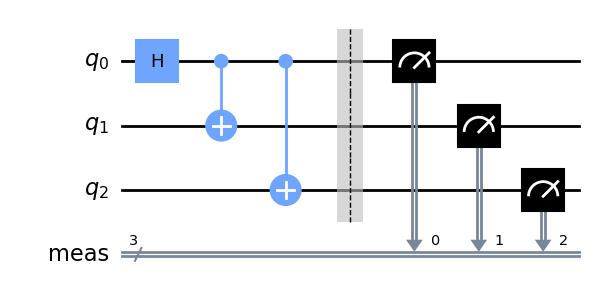

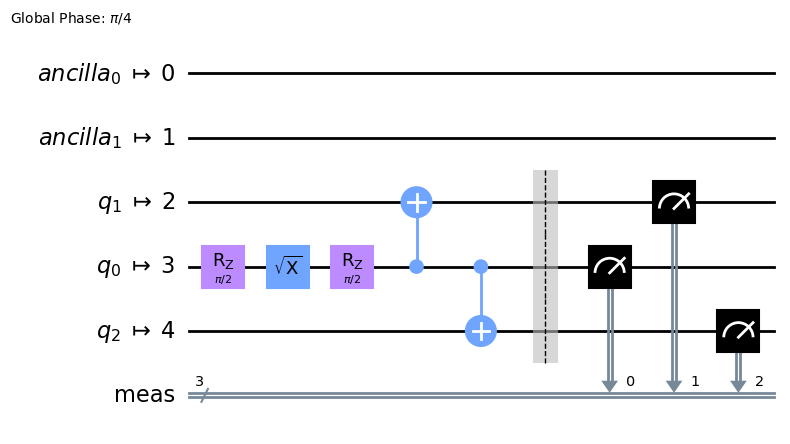

In [16]:
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

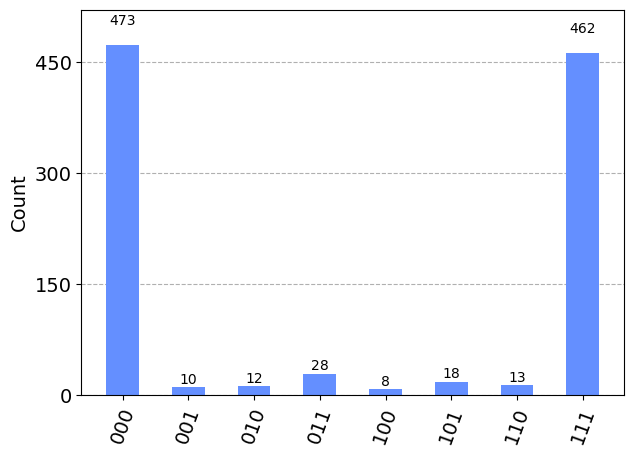

In [17]:
# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

# Dinkhah

In [18]:
import numpy as np 
import scipy.sparse as ss
from scipy.linalg import norm
import qiskit
from qiskit.quantum_info import Statevector,DensityMatrix,partial_trace
from qiskit.quantum_info import entanglement_of_formation, entropy
import h5py

In [19]:
# Define the number of qubit
global qubit 
qubit = 2

In [20]:
# function to define labels
def labelCreation(qubit:int):
    labels = []
    for j in range(2**qubit):
        b = bin(j).replace("0b","")
        if len(b) < qubit:
            n = qubit - len(b)
            b = n*"0"+b
        labels.append(b)
    return labels

In [21]:
# function to define statevector and density matrix 
def StateCreation(coef,labels):
    if np.isclose(np.linalg.norm(coef),1):
        ψ = Statevector(np.zeros(2**qubit))
        for j in range(len(labels)):
            ψ += coef[j]*Statevector.from_label(labels[j])
        ρ = DensityMatrix(ψ)
    else:
        raise TypeError("The coefficient vector is not normalized")
    return ψ, ρ

In [22]:
# check created labels 
labels = labelCreation(qubit)

In [23]:
# Coefficients determination 
coef = np.zeros(2**qubit)
coef[0] = 1./np.sqrt(2);
coef[3] = 1./np.sqrt(2);
# coef[5] = 0.5;
# coef[10] = 0.5;
# coef[15] = 0.5;

In [24]:
# Check labels with their coefficients

for j in range(len(labels)):
    print("j = {}, coef = {}, label = {}".format(j,coef[j],labels[j]))

j = 0, coef = 0.7071067811865475, label = 00
j = 1, coef = 0.0, label = 01
j = 2, coef = 0.0, label = 10
j = 3, coef = 0.7071067811865475, label = 11


In [98]:
# Create quantum state 
ψ, ρ = StateCreation(coef, labels)

In [99]:
# take a look at created state 
ψ.draw('latex')

<IPython.core.display.Latex object>

In [100]:
# take a look at created density matrix
ρ.draw('latex')

<IPython.core.display.Latex object>

In [28]:
ρ.probabilities_dict()

{'00': 0.4999999999999999, '11': 0.4999999999999999}

In [29]:
from qiskit_experiments.library import StateTomography

In [117]:
s = StateTomography(ψ)

In [70]:
from qiskit import Aer

In [102]:
qs = s.run(Aer.aer.get_backend('qasm_simulator'), shots=1000).block_for_results()

In [103]:
for r in qs.analysis_results():
    print(r)

AnalysisResult
- name: state
- value: DensityMatrix([[ 5.04666166e-01+0.00000000e+00j,
                -2.33018988e-03-3.97255217e-03j,
                 4.52182275e-03-5.01089051e-03j,
                 4.95776688e-01+1.28307348e-02j],
               [-2.33018988e-03+3.97255217e-03j,
                 1.96765699e-03+0.00000000e+00j,
                -6.18218984e-05+2.11918862e-03j,
                 1.44449502e-04+4.67787425e-03j],
               [ 4.52182275e-03+5.01089051e-03j,
                -6.18218984e-05-2.11918862e-03j,
                 2.29835403e-03+0.00000000e+00j,
                 5.10193944e-03+2.29068824e-03j],
               [ 4.95776688e-01-1.28307348e-02j,
                 1.44449502e-04-4.67787425e-03j,
                 5.10193944e-03-2.29068824e-03j,
                 4.91067823e-01-1.73472348e-18j]],
              dims=(2, 2))
- extra: <7 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9936436822581295
- device_

In [78]:
d1 = qs.analysis_results()[0].value.data

In [83]:
d2 = qs.analysis_results()[0].value.data

In [88]:
d3 = qs.analysis_results()[0].value.data

In [93]:
d3

array([[ 5.00962337e-01+0.00000000e+00j, -5.22089281e-03+9.44602290e-03j,
        -9.68618108e-03+6.19225067e-03j,  4.96997633e-01+3.33689998e-03j],
       [-5.22089281e-03-9.44602290e-03j,  3.01548608e-03-1.08420217e-19j,
         6.86527561e-04-5.42266333e-04j, -7.61517322e-03-1.01389082e-02j],
       [-9.68618108e-03-6.19225067e-03j,  6.86527561e-04+5.42266333e-04j,
         4.99503137e-04+0.00000000e+00j, -9.81527720e-03-6.92409964e-03j],
       [ 4.96997633e-01-3.33689998e-03j, -7.61517322e-03+1.01389082e-02j,
        -9.81527720e-03+6.92409964e-03j,  4.95522674e-01-4.33680869e-19j]])

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [107]:
a1 = np.zeros((4,4))
a1[0,0] = 0.5
a1

array([[0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

In [108]:
a2 = np.zeros((4,4))
a2[2,2] = 0.5
a2

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. ]])

In [110]:
a = a1+a2
a

array([[0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. ]])

In [112]:
A = DensityMatrix(a)
A

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))


In [125]:
del(b)